<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [58]:
# IMPORT LIBRARIES
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


### 1. Import the data

In [48]:
csv_file = r"D:\Download\DataScience\Files\Week301023_Clustering\ais.csv"
df = pd.read_csv(csv_file)

### 2. Do some EDA of relationships between features.

In [49]:
df.head()

rownames   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht  \
0         1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9   
1         2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7   
2         3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8   
3         4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0   
4         5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6   

     wt sex   sport  
0  78.9   f  B_Ball  
1  74.4   f  B_Ball  
2  69.1   f  B_Ball  
3  74.9   f  B_Ball  
4  64.6   f  B_Ball

In [50]:
df.describe()

rownames         rcc         wcc          hc          hg        ferr  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean   101.500000    4.718614    7.108911   43.091584   14.566337   76.876238   
std     58.456537    0.457976    1.800337    3.662989    1.362451   47.501239   
min      1.000000    3.800000    3.300000   35.900000   11.600000    8.000000   
25%     51.250000    4.372500    5.900000   40.600000   13.500000   41.250000   
50%    101.500000    4.755000    6.850000   43.500000   14.700000   65.500000   
75%    151.750000    5.030000    8.275000   45.575000   15.575000   97.000000   
max    202.000000    6.720000   14.300000   59.700000   19.200000  234.000000   

              bmi         ssf      pcBfat         lbm          ht          wt  
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000  
mean    22.955891   69.021782   13.507426   64.873713  180.103960   75.007921  
std      2.863933   32.565333    6.189826   13.070197    9.734494   13.925199  
min     16.750000   28.000000    5.630000   34.360000  148.900000   37.800000  
25%     21.082500   43.850000    8.545000   54.667500  174.000000   66.525000  
50%     22.720000   58.600000   11.650000   63.035000  179.700000   74.400000  
75%     24.465000   90.350000   18.080000   74.750000  186.175000   84.125000  
max     34.420000  200.800000   35.520000  106.000000  209.400000  123.200000

In [51]:
df.shape

(202, 14)

In [52]:
df.isnull().sum()

rownames    0
rcc         0
wcc         0
hc          0
hg          0
ferr        0
bmi         0
ssf         0
pcBfat      0
lbm         0
ht          0
wt          0
sex         0
sport       0
dtype: int64

In [53]:
# dropping the "rownames" column since it'll shift the index from starting to 0 to 1 instead. It doesn't seem to have any other use aside from being a row index
df.drop(columns = ['rownames'], inplace=True)
df

rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt  \
0    3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   
1    4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   
2    4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   
3    4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   
4    4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   
..    ...  ...   ...   ...   ...    ...    ...     ...    ...    ...   ...   
197  4.90  7.6  45.6  16.0    90  27.56   67.2   11.79  82.00  183.9  93.2   
198  5.66  8.3  50.2  17.7    38  23.76   56.5   10.05  72.00  183.5  80.0   
199  5.03  6.4  42.7  14.3   122  22.01   47.6    8.51  68.00  183.1  73.8   
200  4.97  8.8  43.0  14.9   233  22.34   60.4   11.50  63.00  178.4  71.1   
201  5.38  6.3  46.0  15.7    32  21.07   34.9    6.26  72.00  190.8  76.7   

    sex   sport  
0     f  B_Ball  
1     f  B_Ball  
2     f  B_Ball  
3     f  B_Ball  
4     f  B_Ball  
..   ..     ...  
197   m  W_Polo  
198   m  Tennis  
199   m  Tennis  
200   m  Tennis  
201   m  Tennis  

[202 rows x 13 columns]

<Axes: >

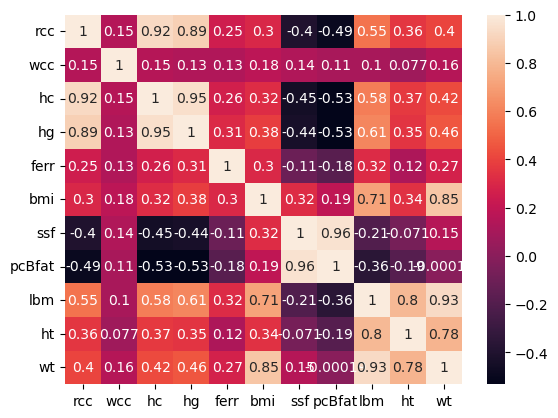

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [54]:
# ANSWER

df_complete = df.copy()
df.drop(columns=['sex', 'sport'], inplace=True)

In [61]:
# The sex column is necessary for later but not the sports column. Dropping one without the other
# Also turning the sex column into numerical data instead of categorial
df_complete.drop(columns=['sport'], inplace=True)
df_complete['sex'] = df_complete['sex'].map({'m': 0, 'f':1})

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [59]:
# ANSWER
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling dataframe
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Running cluster algorithm with 2 and 4 as the k values
random_state = 2020

kmeans_2 = KMeans(n_clusters=2, n_init=10, init='k-means++', random_state=random_state)
kmeans_2.fit(df_scaled)

kmeans_4 = KMeans(n_clusters=4, n_init=10, init='k-means++', random_state=random_state)
kmeans_4.fit(df_scaled)

D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=2020)

### 5. Get the labels for the models

In [57]:
# ANSWER
labels_2 = kmeans_2.labels_
labels_4 = kmeans_4.labels_

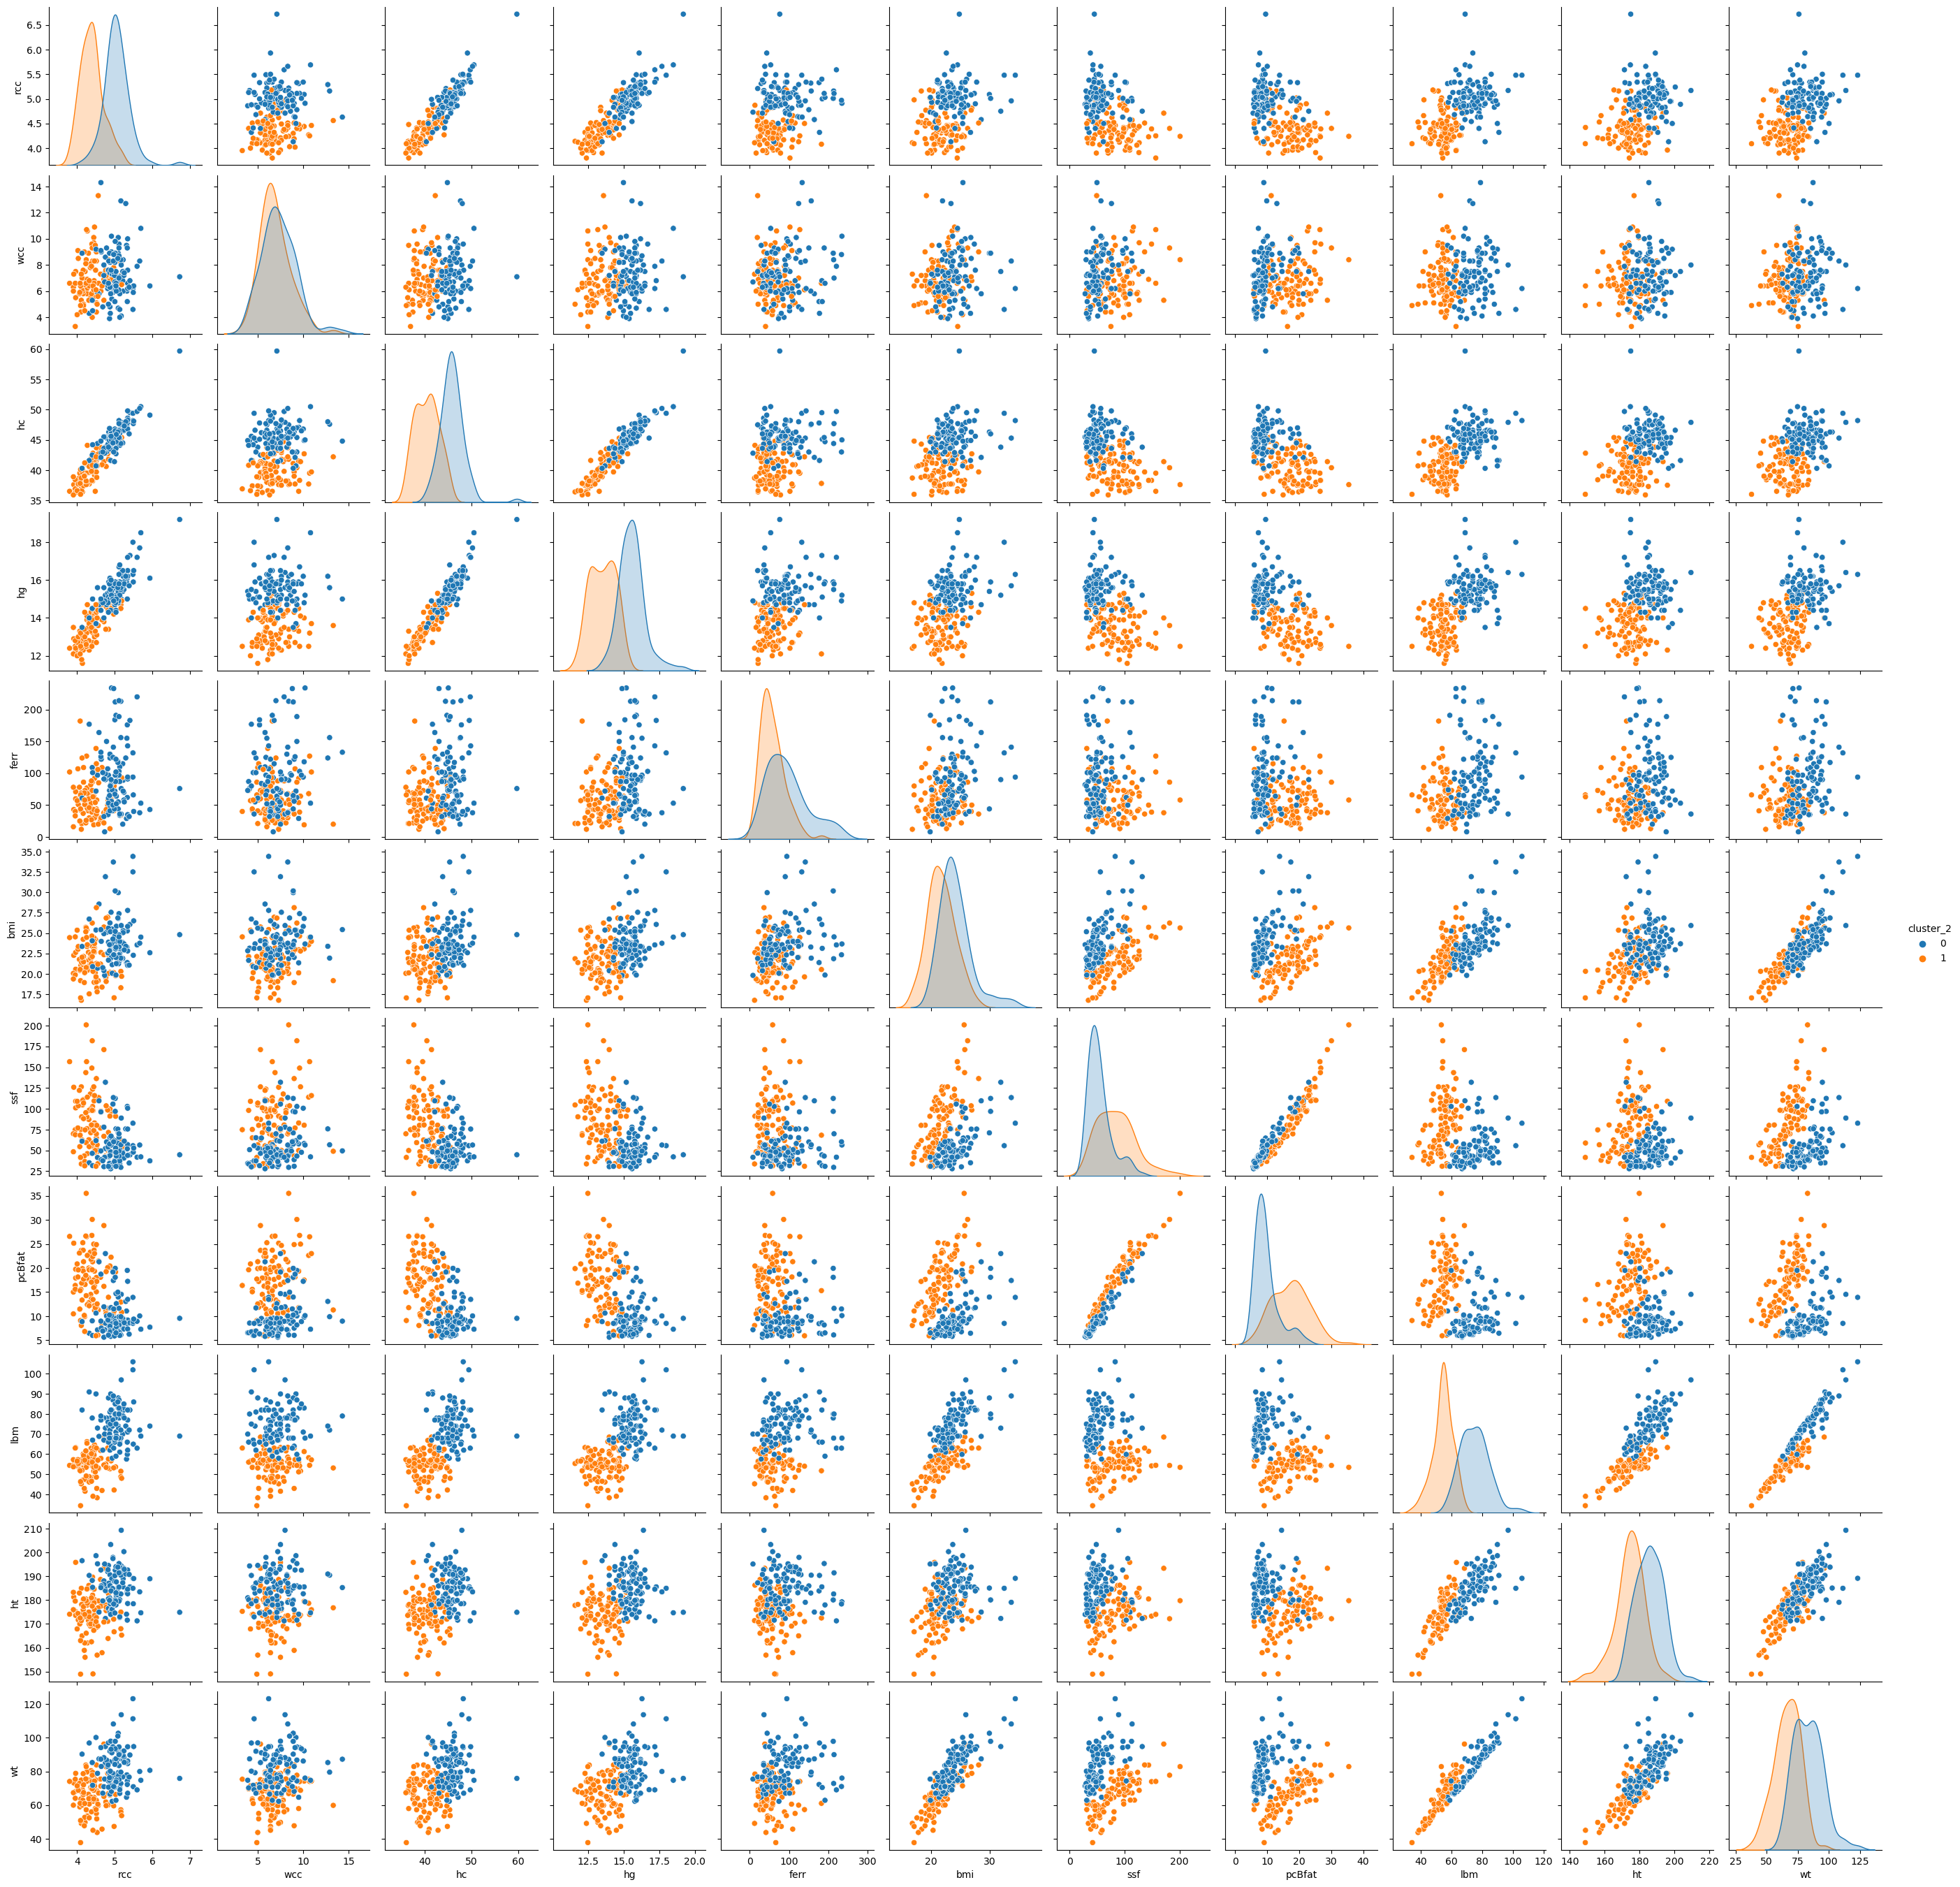

In [31]:
# Visualizing the labels using pairplot. Not sure if the question is asking for it or not but I thought it's a waste to grab the labels_ without utilizing it otherwise
# I did pairplot like this because there's 11 features which means a graph would need to be 11 dimension to plot in one graph

# 2 clusters:
df_vis_2 = df.copy()
df_vis_2['cluster_2'] = kmeans_2.labels_
sns.pairplot(df_vis_2, hue='cluster_2', vars=df_vis_2.columns[:-1])

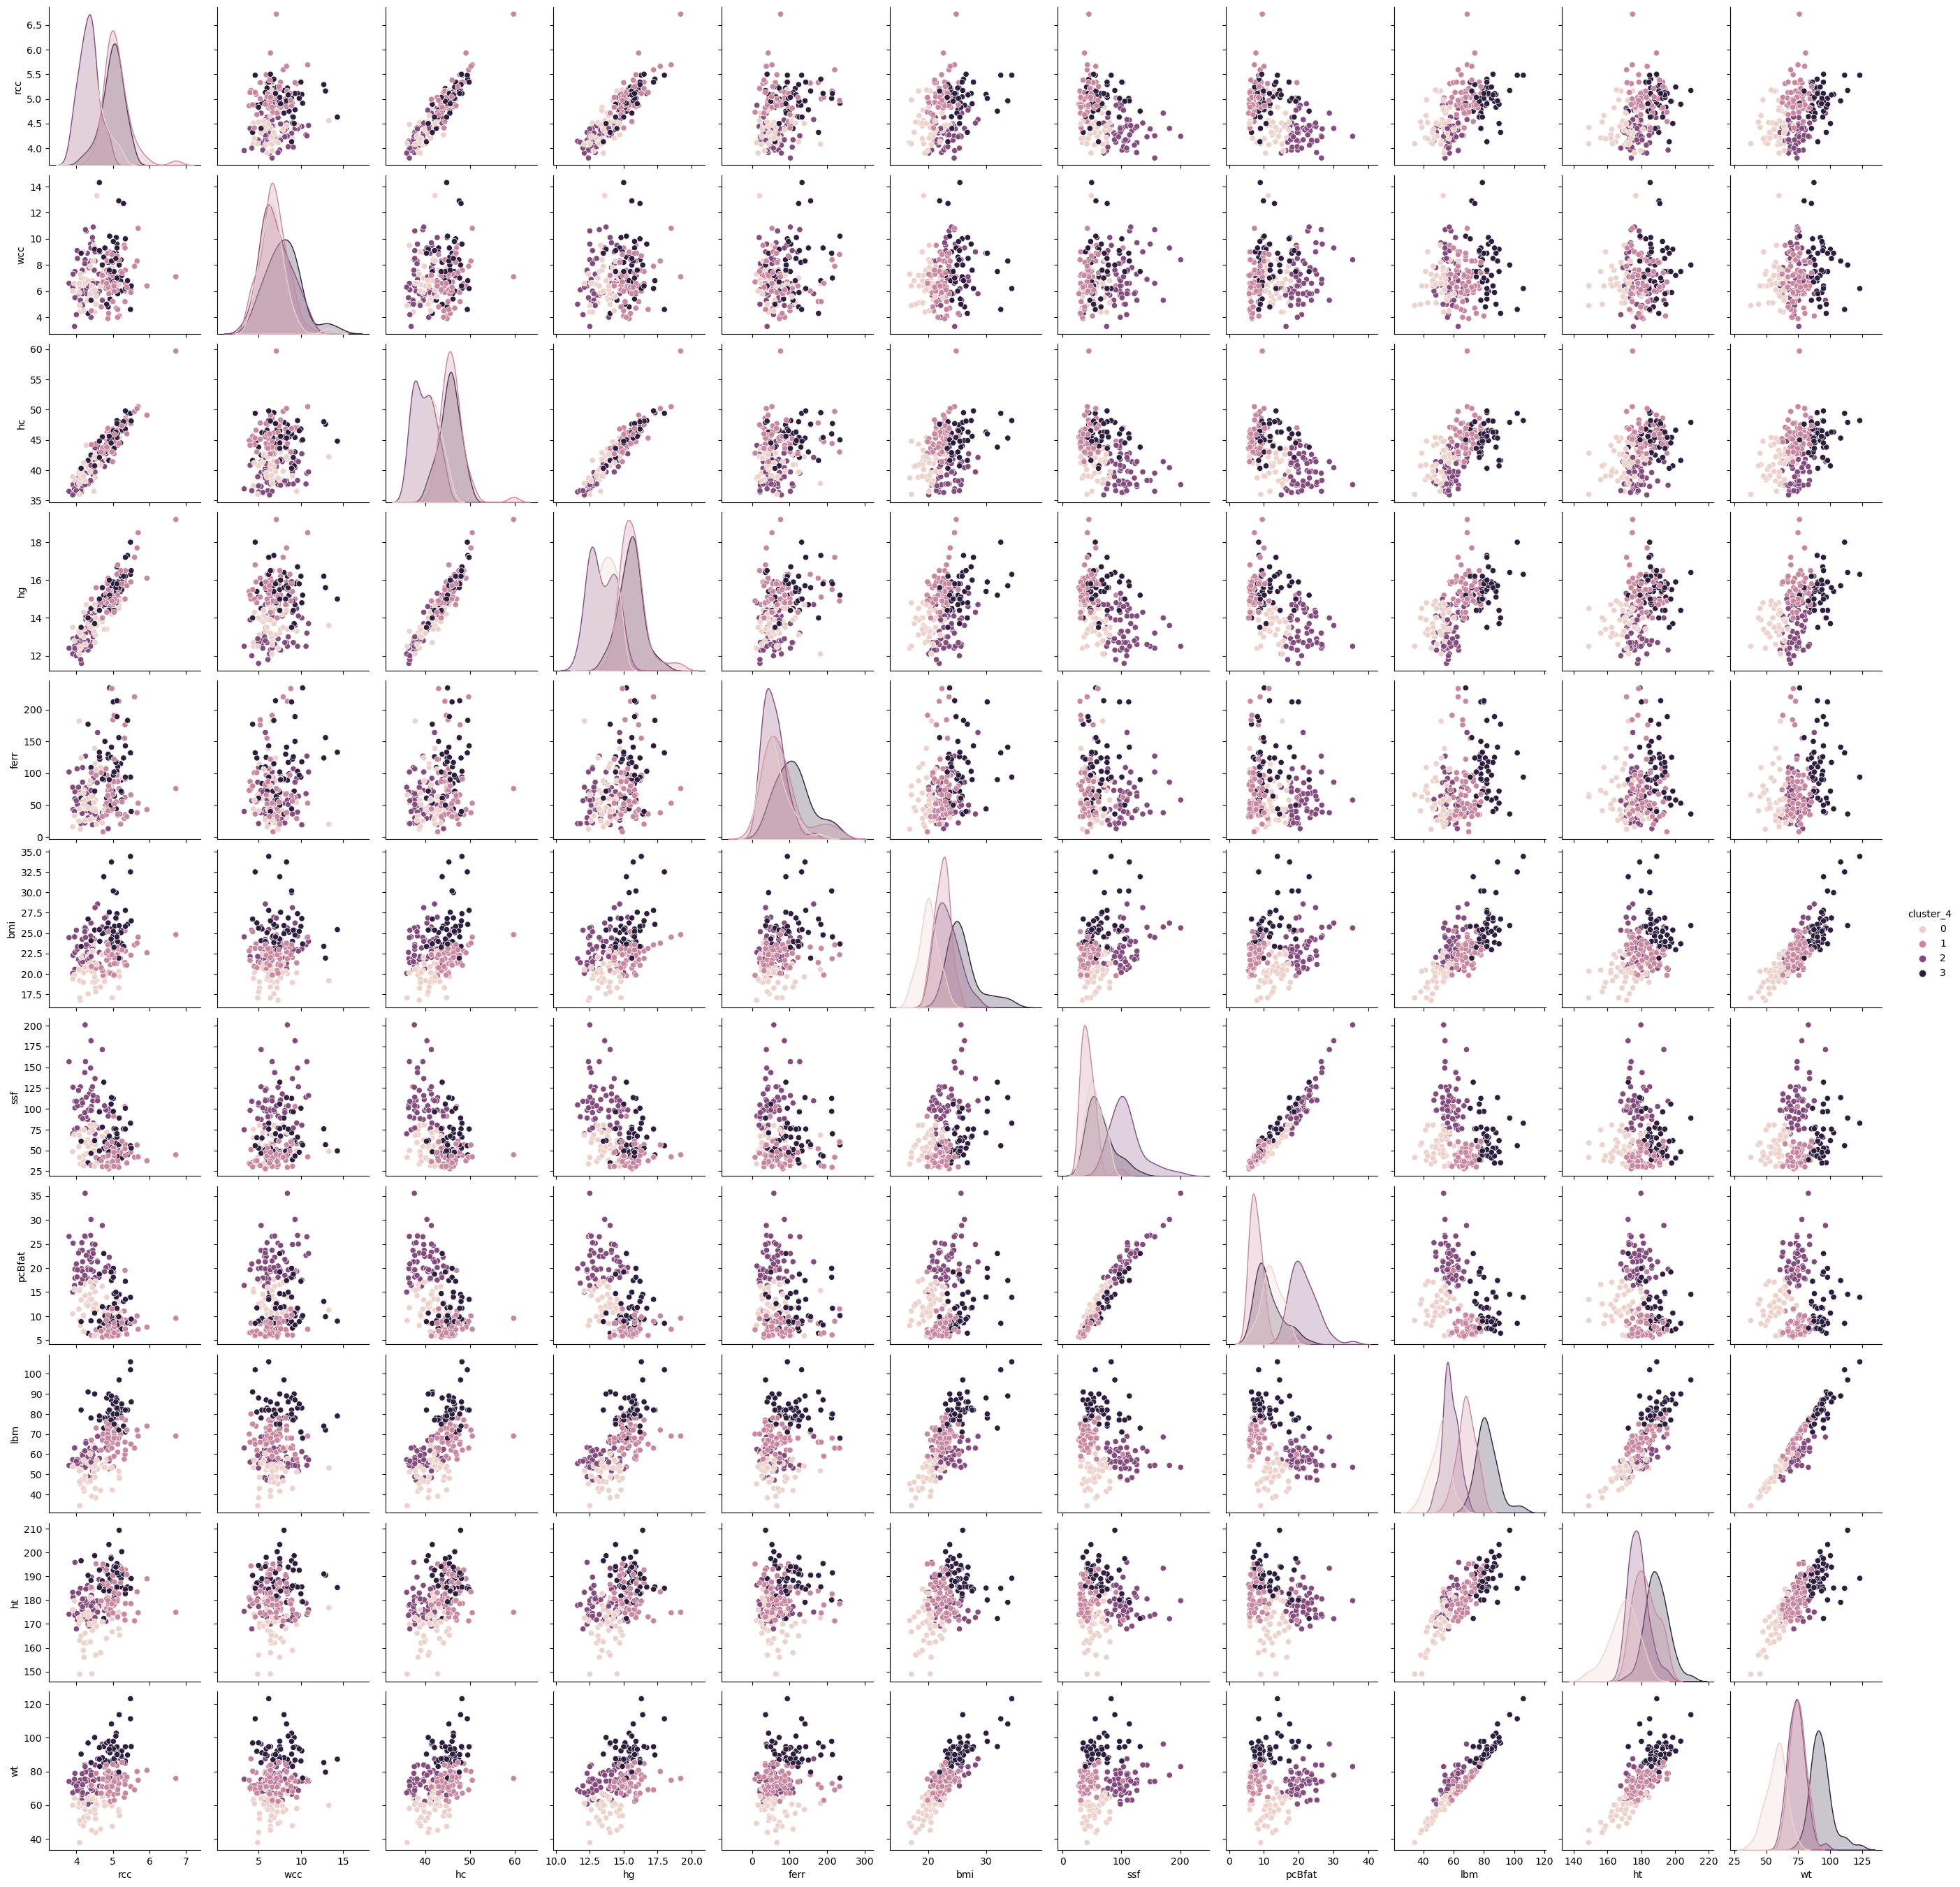

In [32]:
df_vis_4 = df.copy()
df_vis_4['cluster_4'] = kmeans_4.labels_
sns.pairplot(df_vis_4, hue='cluster_4', vars=df_vis_4.columns[:-1])

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [47]:
# ANSWER
elbow = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k, n_init=10, init='k-means++', random_state=random_state).fit(df_scaled)
    elbow.append(kmeans.inertia_)

D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

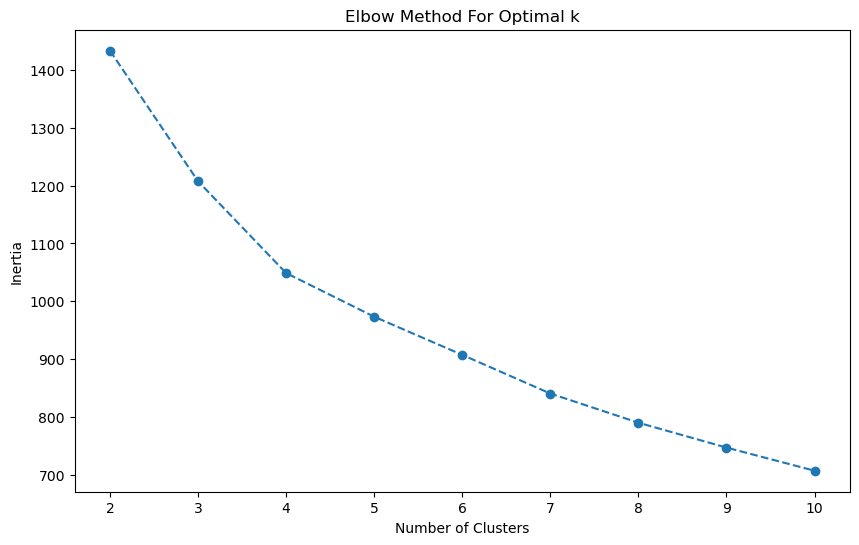

In [39]:
# ANSWER
plt.figure(figsize=(10,6))
plt.plot(range(2, kmax+1), elbow, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

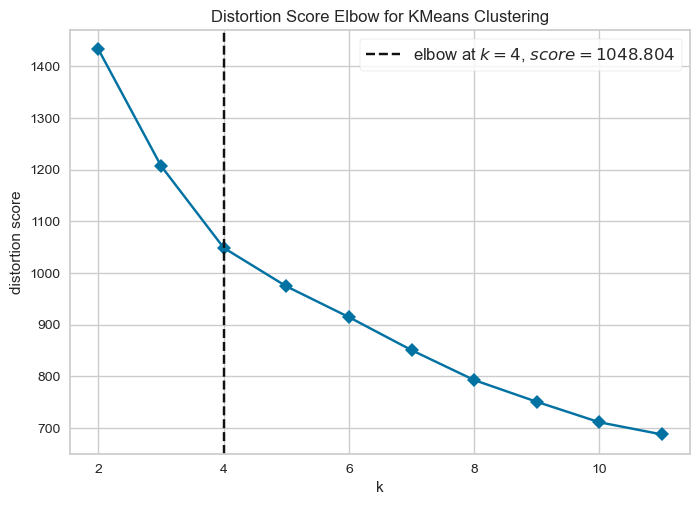

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Was curious about the yellowbrick as well. It's nice to automatically know what the optimal k is without manual guesswork

from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init = 10)
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(df_scaled)
visualizer.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

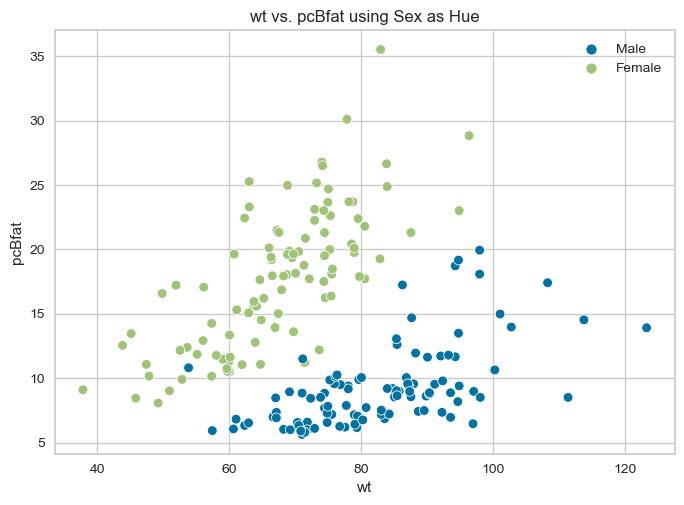

In [72]:
# ANSWER
# Plotting cluster using actual data
sns.scatterplot(x='wt', y='pcBfat', hue='sex', data=df_complete)
plt.title('wt vs. pcBfat using Sex as Hue')

# Modifying legend
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Male', 'Female']
plt.legend(handles, new_labels)
plt.show()

In [71]:
df_vis_2

rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt  \
0    3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   
1    4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   
2    4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   
3    4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   
4    4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   
..    ...  ...   ...   ...   ...    ...    ...     ...    ...    ...   ...   
197  4.90  7.6  45.6  16.0    90  27.56   67.2   11.79  82.00  183.9  93.2   
198  5.66  8.3  50.2  17.7    38  23.76   56.5   10.05  72.00  183.5  80.0   
199  5.03  6.4  42.7  14.3   122  22.01   47.6    8.51  68.00  183.1  73.8   
200  4.97  8.8  43.0  14.9   233  22.34   60.4   11.50  63.00  178.4  71.1   
201  5.38  6.3  46.0  15.7    32  21.07   34.9    6.26  72.00  190.8  76.7   

     cluster_2  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
197          0  
198          0  
199          0  
200          0  
201          0  

[202 rows x 12 columns]

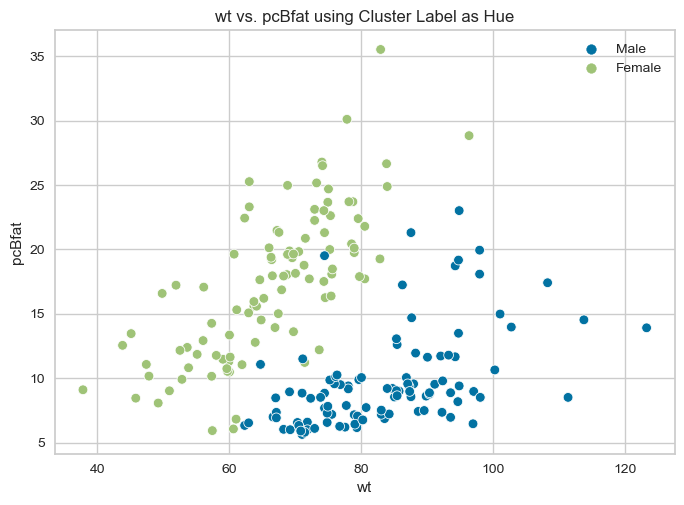

In [78]:
# Plotting cluster using the dataframe with k=2 Kmeans model
sns.scatterplot(x='wt', y='pcBfat', hue='cluster_2', data=df_vis_2)
plt.title('wt vs. pcBfat using Cluster Label as Hue')

# Modifying legend
handles_c2, labels_c2 = plt.gca().get_legend_handles_labels()
new_labels_c2 = ['Male', 'Female']
plt.legend(handles_c2, new_labels_c2)
plt.show()

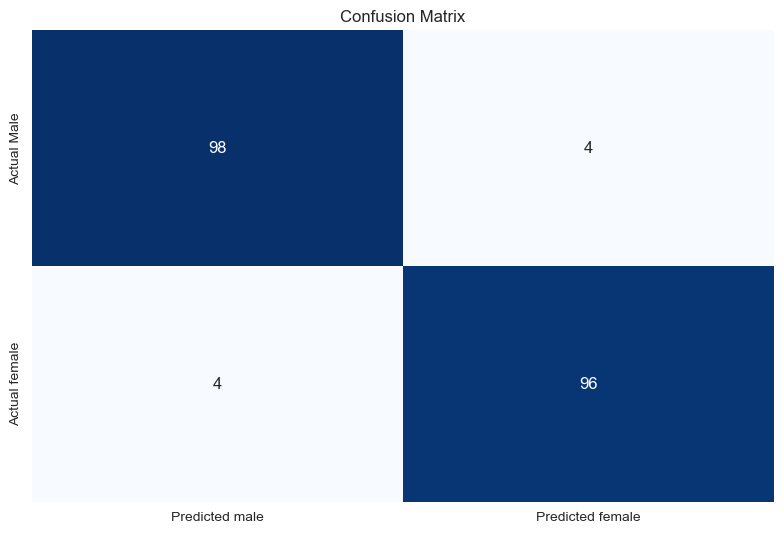

In [79]:
from sklearn.metrics import confusion_matrix

# I know it's not being asked for, but I ws also curious. On top of visual comparison, I want to see number comparison as well
# Decided confusion matrix would be a good way to do this
conf_matrix = confusion_matrix(df_complete['sex'], df_vis_2['cluster_2'])
conf_df = pd.DataFrame(conf_matrix, columns = ['Predicted male', 'Predicted female'], index = ['Actual Male', 'Actual female'])
sns.heatmap(conf_df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



